In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [2]:
df = pd.read_csv("F1DriversDataset 2.csv")
df

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.000000,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.000000,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.000000,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.000000,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.000000,0.000000,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Emilio Zapico,Spain,[1976],0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.000000,0.0,0.0,0.000000,0.000000,1,False
864,Zhou Guanyu,China,[2022],0.0,23.0,23.0,0.0,0.0,0.0,2.0,...,NaN,2020,0.0,1.000000,0.0,0.0,0.086957,0.260870,1,False
865,Ricardo Zonta,Brazil,"[1999, 2000, 2001, 2004, 2005]",0.0,37.0,36.0,0.0,0.0,0.0,0.0,...,NaN,2000,0.0,0.972973,0.0,0.0,0.000000,0.081081,5,False
866,Renzo Zorzi,Italy,"[1975, 1976, 1977]",0.0,7.0,7.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,1.000000,0.0,0.0,0.000000,0.142857,3,False


In [3]:
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [4]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

# What is the distribution of drivers' nationalities in the dataset?

In [5]:
nationality_drivers = df['Nationality'].value_counts().sort_values(ascending=False).head(20)
nationality_drivers

United Kingdom    164
United States     160
Italy              99
France             72
West Germany       39
Brazil             32
Argentina          25
Switzerland        24
Belgium            23
South Africa       23
Japan              21
Australia          18
Austria            16
Netherlands        16
Spain              15
Canada             15
Germany            14
Sweden             11
Finland             9
New Zealand         9
Name: Nationality, dtype: int64

In [6]:

def generate_chart(names, values):
    df = px.data.tips() 
    fig = px.pie(df, values=values, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
    return fig

generate_chart(nationality_drivers.index,nationality_drivers.values)




There are more drivers from the UK than the US.

# What is the correlation between the number of seasons a driver participates in and their number of race wins?

In [7]:
df_winsvsyears = df[['Years_Active','Race_Wins']]
df_winsvsyears.head()

,Years_Active,Race_Wins
0,2,0.0
1,2,0.0
2,2,0.0
3,5,0.0
4,1,0.0


In [8]:
df_winsvsyears.fillna(method ='ffill',inplace=True)

/var/folders/m8/46ljcdl90cgc6gmrl35m898c0000gn/T/ipykernel_90996/1976922437.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
df_winsvsyears.isnull().sum()

Years_Active    0
Race_Wins       0
dtype: int64

In [10]:
X= df_winsvsyears['Years_Active'].to_numpy().reshape(-1,1)
y = df_winsvsyears['Race_Wins'].to_numpy().reshape(-1,1)

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=None)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)



/var/folders/m8/46ljcdl90cgc6gmrl35m898c0000gn/T/ipykernel_90996/299058993.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [12]:
corr_coef = df['Years_Active'].corr(df['Race_Wins'])
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("corr coef",corr_coef)

Mean Squared Error:  23.346336606240193
corr coef 0.5037167768266374


there may be other factors beyond the number of years of experience that contribute to a driver's success in Formula 1.

# Pole positions vs Race wins of champions

In [13]:
df_champions = df.query('Championships > 0')
df_champions.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,"[2005, 2006]",2010,0.061281,0.991643,0.089136,0.275766,0.064067,5.782730,19,True
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,[1978],1980,0.137405,0.977099,0.091603,0.145038,0.076336,1.374046,14,True
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,"[1952, 1953]",1950,0.424242,0.969697,0.393939,0.515152,0.363636,3.261818,6,True
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,"[1959, 1960, 1966]",1960,0.101562,0.984375,0.109375,0.242188,0.093750,1.976562,16,True
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,[2009],2010,0.025890,0.990291,0.048544,0.161812,0.025890,3.996764,18,True


In [14]:
df_champions.isnull().sum()

Driver                0
Nationality           0
Seasons               0
Championships         0
Race_Entries          0
Race_Starts           0
Pole_Positions        0
Race_Wins             0
Podiums               0
Fastest_Laps          0
Points                0
Active                0
Championship Years    0
Decade                0
Pole_Rate             0
Start_Rate            0
Win_Rate              0
Podium_Rate           0
FastLap_Rate          0
Points_Per_Entry      0
Years_Active          0
Champion              0
dtype: int64

In [15]:
from sklearn.metrics import mean_squared_error
def linear_regression(df, predictor, target):
    
    # to fit a linear regression model to the data
    X = df[predictor].values.reshape(-1,1)
    y = df[target].values.reshape(-1,1)
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    
    # Calculate the R-squared value of the linear regression model
    r_squared = regressor.score(X, y)
    
    # Calculate the correlation coefficient 
    corr_coef = df[predictor].corr(df[target])
    
    # Predict the target variable using the predictor variable
    y_pred = regressor.predict(X)
    
    # Calculate the prediction score
    prediction_score = mean_squared_error(y, y_pred)
    
    # Create a scatter plot to visualize the relationship between the predictor and target
    fig = sns.lmplot(x=predictor,y=target,data=df)
    
    # Plot the regression line on top of the scatter plot
    plt.plot(df[predictor], regressor.predict(df[[predictor]]), color='red')
    
    return corr_coef, r_squared, y_pred, prediction_score, fig


prediction_score 68.33930367927572
correlation coefficient 0.9280326627611927
R-squared: 0.8612446231516298


/Users/chandanamulagund/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



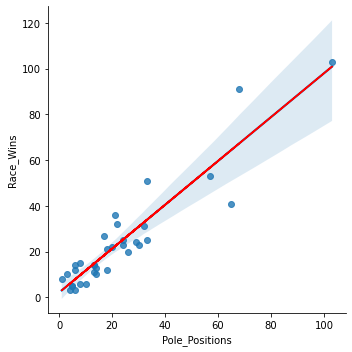

In [16]:
corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')


print('prediction_score', prediction_score)
print('correlation coefficient', corr_coef)
print('R-squared:', r_squared)



the pole position is a very good predictor of race wins for champions, and that a higher pole position is generally associated with a higher number of race wins.

#### What is the correlation between other columns with 'Championships' column?

                  Championships  Race_Entries  Race_Starts  Pole_Positions  \
Championships          1.000000      0.462985     0.471073        0.869342   
Race_Entries           0.462985      1.000000     0.996701        0.582264   
Race_Starts            0.471073      0.996701     1.000000        0.591793   
Pole_Positions         0.869342      0.582264     0.591793        1.000000   
Race_Wins              0.915247      0.590658     0.600889        0.954951   
Podiums                0.808274      0.757007     0.768449        0.901514   
Fastest_Laps           0.829641      0.681107     0.691432        0.899697   
Points                 0.655567      0.689361     0.701817        0.799746   
Active                 0.136394      0.273960     0.282485        0.203489   
Decade                 0.105263      0.498214     0.489603        0.181147   
Pole_Rate              0.675121      0.360392     0.367880        0.724572   
Start_Rate             0.101046      0.250540     0.275386      

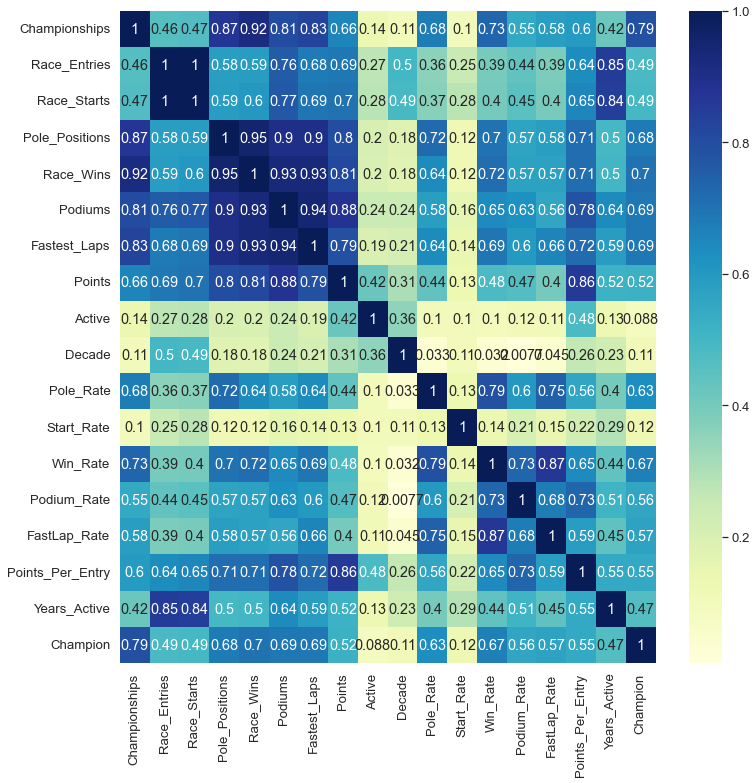

In [107]:
print(df.corr())
plt.figure(figsize=(12,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

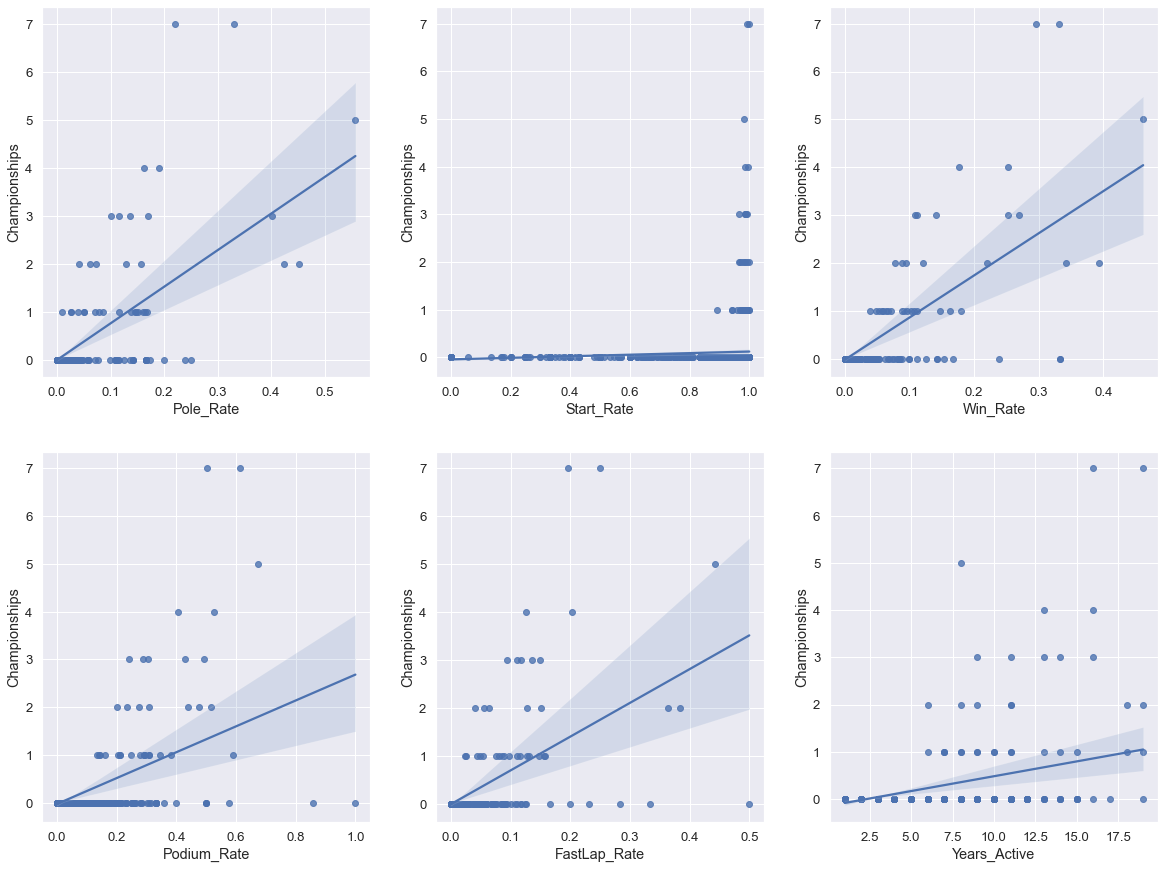

In [72]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=1)
plt.show()

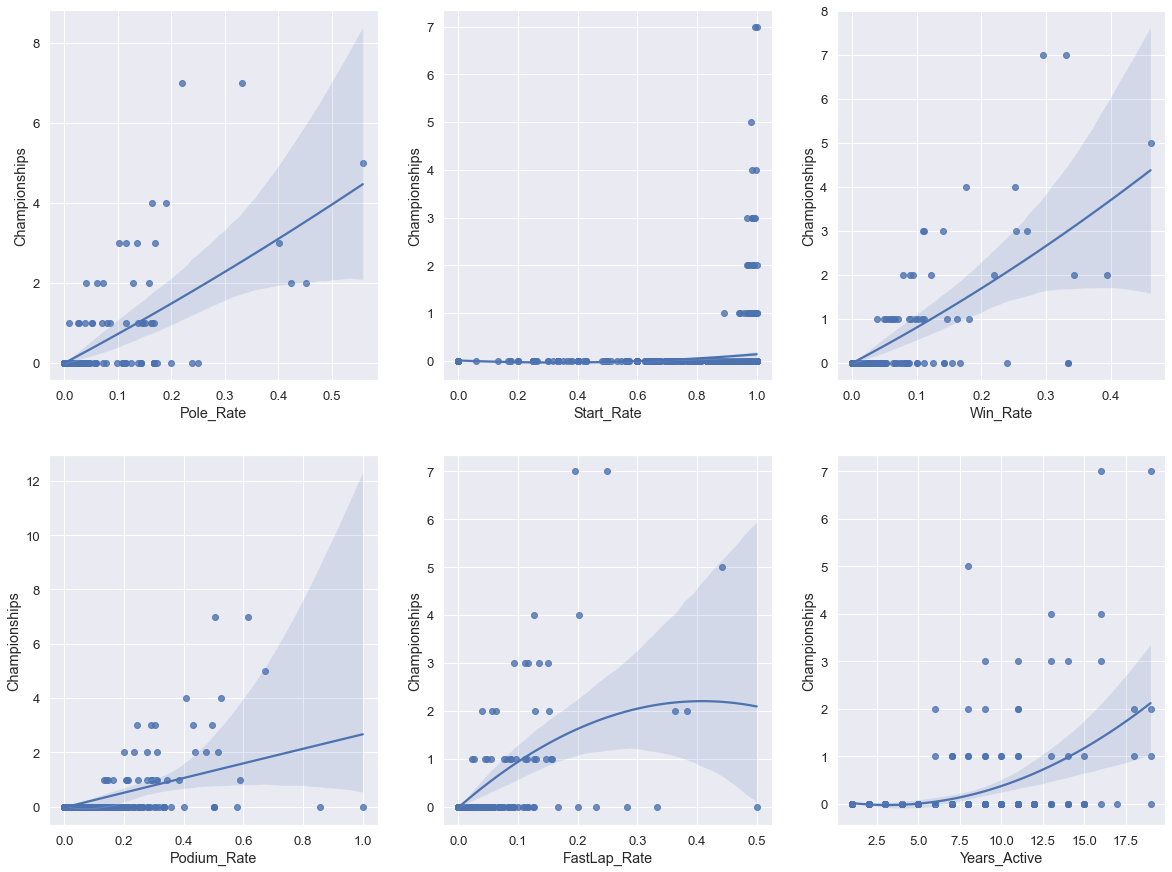

In [70]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=2)
plt.show()